In [1]:
# ORAIL CITIZEN AI - Environment Setup
exec(open('../config/environment.py').read())

print("ORAIL CITIZEN AI - Jupyter Lab Session Started")
print("=" * 50)


ORAIL CITIZEN AI Environment Loaded
Project root: C:\Users\josze\MYRworkspace-CitizenAI-poverty-mapping\notebooks
NumPy: 1.26.4
Pandas: 2.2.2
GPU: NVIDIA GeForce RTX 4070 Laptop GPU
ORAIL CITIZEN AI - Jupyter Lab Session Started


In [2]:
# Verify your powerful system setup
import sys
print(f"Python: {sys.version}")
print(f"Working from: {os.getcwd()}")

# Check your existing packages
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    print(f"NumPy: {np.__version__}")
    print(f"Pandas: {pd.__version__}")
    print("Basic packages: OK")
except ImportError as e:
    print(f"Package error: {e}")

# Check your GPU
try:
    import torch
    if torch.cuda.is_available():
        print(f"GPU: {torch.cuda.get_device_name(0)}")
        print(f"CUDA: {torch.version.cuda}")
    else:
        print("GPU: CPU mode")
except ImportError:
    print("PyTorch: Not available")

try:
    import tensorflow as tf
    print(f"TensorFlow: {tf.__version__}")
    gpus = tf.config.list_physical_devices('GPU')
    print(f"TF GPUs: {len(gpus)}")
except ImportError:
    print("TensorFlow: Not available")
    

Python: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Working from: C:\Users\josze\MYRworkspace-CitizenAI-poverty-mapping\notebooks
NumPy: 1.26.4
Pandas: 2.2.2
Basic packages: OK
GPU: NVIDIA GeForce RTX 4070 Laptop GPU
CUDA: 12.1
TensorFlow: 2.19.0
TF GPUs: 0


In [3]:
# Create sample poverty mapping data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Creating ORAIL poverty mapping demonstration...")

# Generate sample data (representing Philippine region)
np.random.seed(42)
n_locations = 1000

poverty_data = pd.DataFrame({
    'latitude': np.random.uniform(14.0, 15.0, n_locations),
    'longitude': np.random.uniform(120.0, 121.0, n_locations),
    'poverty_rate': np.random.beta(2, 5, n_locations),
    'population': np.random.randint(100, 10000, n_locations),
    'education_index': np.random.uniform(0.3, 0.9, n_locations),
    'health_index': np.random.uniform(0.4, 0.95, n_locations),
    'infrastructure_index': np.random.uniform(0.2, 0.8, n_locations)
})

print(f"Dataset: {len(poverty_data)} locations")
print(f"Avg poverty rate: {poverty_data['poverty_rate'].mean():.3f}")
print(f"High poverty areas: {(poverty_data['poverty_rate'] > 0.3).sum()}")

poverty_data.head()

Creating ORAIL poverty mapping demonstration...
Dataset: 1000 locations
Avg poverty rate: 0.287
High poverty areas: 423


,latitude,longitude,poverty_rate,population,education_index,health_index,infrastructure_index
0,14.374540,120.185133,0.199189,1463,0.626044,0.426377,0.242523
1,14.950714,120.541901,0.500671,4608,0.482857,0.826475,0.558909
2,14.731994,120.872946,0.336550,1855,0.409085,0.713876,0.358643
3,14.598658,120.732225,0.012577,619,0.351546,0.818388,0.516575
4,14.156019,120.806561,0.230060,5563,0.728471,0.482425,0.510477


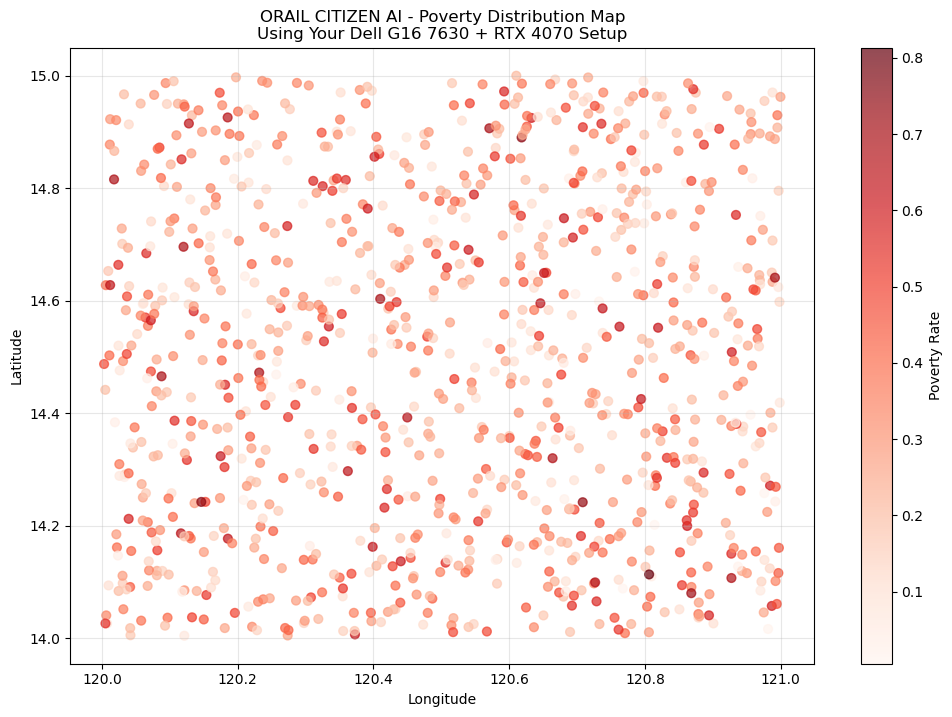

Map saved to: outputs/visualizations/orail_first_map.png


In [4]:
# Create poverty distribution map
plt.figure(figsize=(12, 8))

scatter = plt.scatter(poverty_data['longitude'], poverty_data['latitude'], 
                     c=poverty_data['poverty_rate'], 
                     cmap='Reds', alpha=0.7, s=40)

plt.colorbar(scatter, label='Poverty Rate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('ORAIL CITIZEN AI - Poverty Distribution Map\nUsing Your Dell G16 7630 + RTX 4070 Setup')
plt.grid(True, alpha=0.3)

# Save the visualization
plt.savefig('../outputs/visualizations/orail_first_map.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("Map saved to: outputs/visualizations/orail_first_map.png")

In [5]:
# Save the demonstration data
poverty_data.to_csv('../data/processed/orail_demo_data.csv', index=False)

# Create summary
summary = poverty_data.describe()
print("Data Summary:")
print(summary)

print("\nORail CITIZEN AI demonstration complete!")
print("Files created:")
print("- data/processed/orail_demo_data.csv")
print("- outputs/visualizations/orail_first_map.png")

Data Summary:
          latitude    longitude  poverty_rate   population  education_index  \
count  1000.000000  1000.000000   1000.000000  1000.000000      1000.000000   
mean     14.490257   120.507017      0.287333  4962.986000         0.588560   
std       0.292137     0.292190      0.158314  2844.838998         0.170079   
min      14.004632   120.003218      0.005368   102.000000         0.300146   
25%      14.235973   120.241074      0.168803  2609.750000         0.440559   
50%      14.496807   120.518734      0.267873  4900.500000         0.581292   
75%      14.744320   120.760465      0.389358  7421.250000         0.728113   
max      14.999718   120.999414      0.813342  9958.000000         0.899343   

       health_index  infrastructure_index  
count   1000.000000           1000.000000  
mean       0.672125              0.496653  
std        0.154184              0.172905  
min        0.400029              0.200145  
25%        0.545016              0.345435  
50%       